# Assignment 17 (Support Vector Machines) Salary_Dataset

## Q. 1) Prepare a classification model using SVM for salary data 

## Data Description:

## age -- age of a person
## workclass	-- A work class is a grouping of work 
## education	-- Education of an individuals	
## maritalstatus -- Marital status of an individulas	
## occupation	 -- occupation of an individuals
## relationship -- 	
## race --  Race of an Individual
## sex --  Gender of an Individual
## capitalgain --  profit received from the sale of an investment	
## capitalloss	-- A decrease in the value of a capital asset
## hoursperweek -- number of hours work per week	
## native -- Native of an individual
## Salary -- salary of an individual

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions

In [2]:
# Loading the Datasets
test_tmp = pd.read_csv("SalaryData_Test(1).csv")
train_tmp = pd.read_csv("SalaryData_Train(1).csv")

In [3]:
df_tmp = test_tmp.append(train_tmp)

In [4]:
test = test_tmp.copy()
train = train_tmp.copy()

In [5]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [8]:
number = LabelEncoder()

In [9]:
for i in str_c:
    train[i]= number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])

In [10]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [11]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [12]:
mapping = {' >50K': 1, ' <=50K': 2}

In [13]:
train = train.replace({'Salary': mapping})
test = test.replace({'Salary': mapping})

In [14]:
salary_df = train.append(test)

In [15]:
salary_df1 = salary_df.copy()

In [16]:
salary_df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2


In [17]:
salary_df1.shape

(45221, 14)

In [18]:
salary_df1.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,2.204507,10.313217,10.118463,2.585148,5.969572,1.412684,3.680281,0.675062,1101.454700,88.548617,40.938038,35.431503,1.752151
std,13.217981,0.958132,3.816992,2.552909,1.500460,4.026444,1.597242,0.832361,0.468357,7506.511295,404.838249,12.007640,5.931380,0.431769
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,2.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,2.000000
75%,47.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,2.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,2.000000


In [19]:
salary_df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

## Correlation Analysis

In [20]:
corr = salary_df1.corr()

<AxesSubplot:>

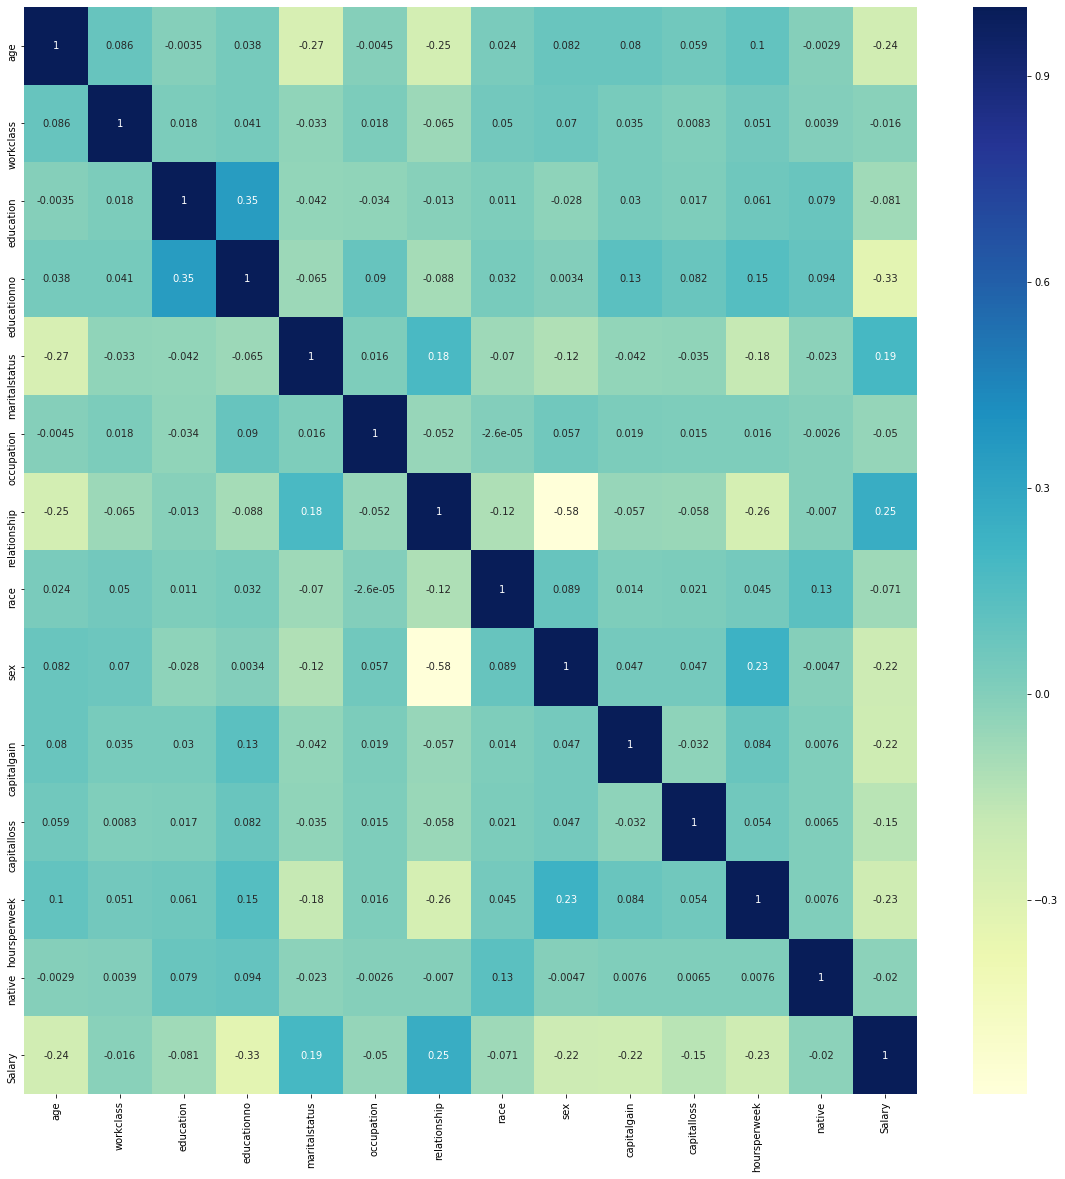

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap="YlGnBu",annot=True)

In [22]:
plt.rcParams["figure.figsize"] = 9,5

Skewness: -0.31062061074424
Kurtosis: 0.6350448194491634


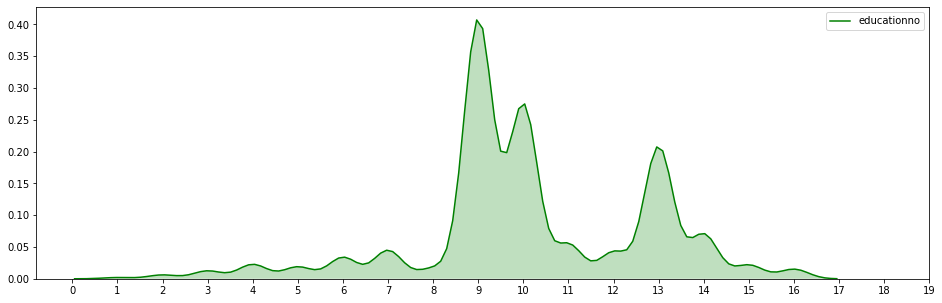

In [23]:
plt.figure(figsize=(16,5))
print("Skewness: {}".format(salary_df1['educationno'].skew()))
print("Kurtosis: {}".format(salary_df1['educationno'].kurtosis()))
ax = sns.kdeplot(salary_df1['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

## The Data is Negatively Skewed and has Low Kurtosis Value
## Most of the People have Education Number of Years of Education 9 - 10 

In [24]:
dfa = df_tmp[df_tmp.columns[0:13]]
obj_column = dfa.select_dtypes(include='object').columns.tolist()

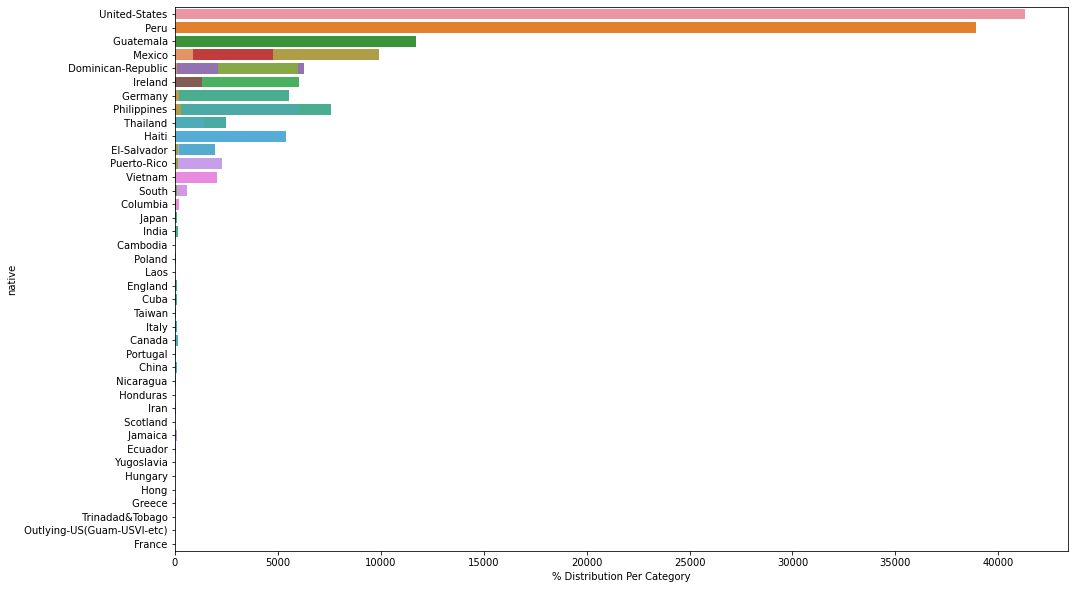

In [25]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_column,1):
    sns.countplot(data=dfa,y=col)
    plt.ylabel(col)
    plt.xlabel('% Distribution Per Category')
plt.show()

In [26]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

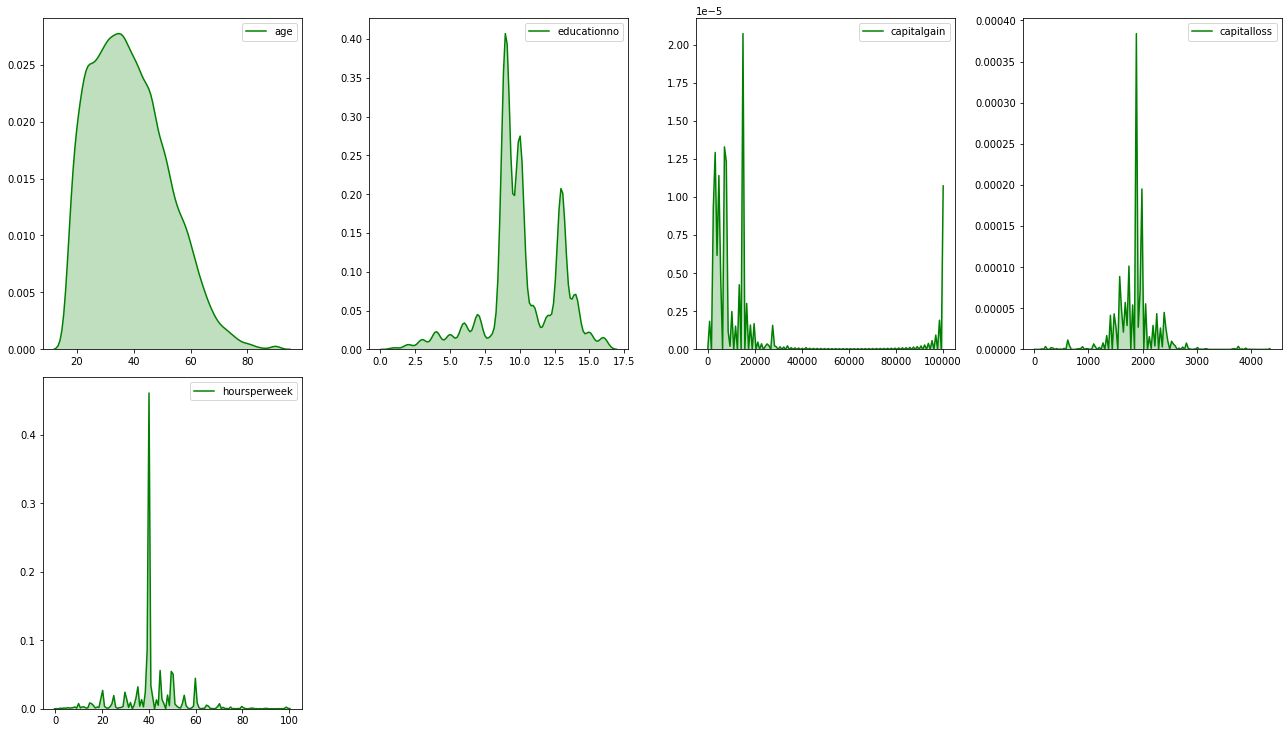

,age,educationno,capitalgain,capitalloss,hoursperweek
Skewness,0.532784,-0.310621,11.788871,4.517536,0.340536
Kurtosis,-0.155931,0.635045,150.147899,19.376085,3.201287


In [27]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(salary_df[col],color='g',shade=True)
plt.tight_layout() 
plt.show()
num_data = salary_df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['Skewness','Kurtosis'])

## Age has negative kurtosis and capital gain has high kurtosis

## SVM

In [28]:
col = salary_df1.columns

In [29]:
x_train = train[col[0:13]]
y_train = train[col[13]]
x_test = test[col[0:13]]
y_test = test[col[13]]

In [30]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [31]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

## Linear

In [32]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy :  0.8097609561752988


## Poly

In [33]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy :",metrics.accuracy_score(y_test, pred_test_poly))

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy : 0.8156042496679947


## RBF 

In [34]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy :",metrics.accuracy_score(y_test, pred_test_rbf))

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy : 0.8272244355909695


## Sigmoid 

In [35]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy :",metrics.accuracy_score(y_test, pred_test_sigmoid))

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy : 0.8041168658698539


## Conclusion
## RBF Model gives the best accuracy